# Проектная работа
# Анализ оттока клиентов фитнес-центра

_____
**Описание исследования.**

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных. 
    
_____
**Цель исследования.**

    
_____
**Задачи исследования.**

провести анализ и подготовить план действий по удержанию клиентов.  
А именно: 
научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
проанализировать основные признаки, наиболее сильно влияющие на отток;
сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:

    1) выделить целевые группы клиентов;
    2) предложить меры по снижению оттока;
    3) определить другие особенности взаимодействия с клиентами.

1. [**Знакомство с данными**](#start)

2. [**Исследовательский анализ данных**](#analysis)
    * [Задача 1](#1) - Изучить датасет. Выяснить, есть ли в нём отсутствующие значения, изучить средние значения и стандартные отклонения. 
    * [Задача 2](#2) - Изучить средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.
    * [Задача 3](#3) - Построить столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).
    * [Задача 4](#4) - Построить матрицу корреляций и отобразить её. 
    
    
3. [**Модель прогнозирования оттока клиентов**](#model) 

    Построить модель бинарной классификации клиентов, где целевой признак — факт оттока клиента в следующем месяце:
    * [Задача 6](#6) - Разбить данные на обучающую и валидационную выборку функцией train_test_split().
    * [Задача 7](#7) - Обучить модель на train-выборке двумя способами:
         - логистической регрессией
         - случайным лесом
    * [Задача 8](#8) - Оценить метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравнить по ним модели. Определить, какая модель показала себя лучше на основании метрик.


4. [**Кластеризация клиентов**](#clustering)

   Отложить в сторону столбец с оттоком и проведите кластеризацию объектов (клиентов):
    * [Задача 9](#9) - Стандартизировать данные.
    * [Задача 10](#10) - Построить матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисовать дендрограмму. На основании полученного графика предположить, какое количество кластеров можно выделить.
    * [Задача 11](#11) - Обучить модель кластеризации на основании алгоритма K-Means и спрогнозировать кластеры клиентов.
    * [Задача 12](#12) - Изучить средние значения признаков для кластеров.
    * [Задача 13](#13) - Постройте распределения признаков для кластеров.
    * [Задача 14](#14) - Для каждого полученного кластера посчитать долю оттока. Определить, отличаются ли они по доле оттока, и какие кластеры склонны к оттоку, а какие — надёжны.
    
    
5. [**Выводы и базовые рекомендации по работе с клиентами**](#end)
    - Сформулировать основные выводы.
    - Предложить рекомендации для стратегии взаимодействия с клиентами и их удержания. 

### Знакомство с данными <a id="start"></a>

Импортируем нужные для работы библиотеки.

In [27]:
import pandas as pd
import itertools

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

from scipy.cluster.hierarchy import dendrogram, linkage

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
from plotly import graph_objects as go

import warnings
warnings.filterwarnings('ignore')

import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

Сохраним датасет в переменную и выведем его на экран.

In [3]:
gym = pd.read_csv('https://code.s3.yandex.net/datasets/gym_churn.csv')

In [4]:
display(gym)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


Имеется датафрейм длиной 4000 строк и 14 колонок

Набор данных включает следующие поля:

   * Данные клиента за предыдущий до проверки факта оттока месяц:
        - `'gender'` — пол
        - `'Near_Location'` — проживание или работа в районе, где находится фитнес-центр
        - `'Partner'` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента)
        - `'Promo_friends'` — факт первоначальной записи в рамках акции «приведи друга» (использован промо-код от знакомого при оплате первого абонемента)
        - `'Phone'` — наличие контактного телефона
        - `'Age'` — возраст
        - `'Lifetime'` — время с момента первого обращения в фитнес-центр в месяцах
        
        
   * Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
        - `'Contract_period'` — длительность текущего действующего абонемента (месяц, 6 месяцев, год)
        - `'Month_to_end_contract'` — срок до окончания текущего действующего абонемента (в месяцах)
        - `'Group_visits'` — факт посещения групповых занятий
        - `'Avg_class_frequency_total'` — средняя частота посещений в неделю за все время с начала действия абонемента
        - `'Avg_class_frequency_current_month'` — средняя частота посещений в неделю за предыдущий месяц
        - `'Avg_additional_charges_total'` — суммарная выручка от других услуг фитнес-центра: кафе, спорттовары, косметический и массажный салон
        - `'Churn'` — факт оттока в текущем месяце

### Исследовательский анализ данных <a id="analysis"></a>

**Задача 1**<a id="1"></a>

- Изучить датасет. Выяснить, есть ли в нём отсутствующие значения, изучить средние значения и стандартные отклонения.

Выведем информацию о типах имеющихся данных

In [5]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Все наши признаки численные, пропусков нет.

Выведем информацию о возможных явных дубликатах

In [6]:
gym.duplicated().sum()

0

Приведем колонки к нижнему регистру и столбец со сроком до окончания текущего действующего абонемента приведем к целочисленному значению

In [7]:
gym.columns = gym.columns.str.lower()

In [8]:
gym['avg_additional_charges_total'] = gym['avg_additional_charges_total'].round(2)
gym['avg_class_frequency_total'] = gym['avg_class_frequency_total'].round(2)
gym['avg_class_frequency_current_month'] = gym['avg_class_frequency_current_month'].round(2)
gym['month_to_end_contract'] = gym['month_to_end_contract'].astype('int')
gym.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.23,5,3,0.02,0.00,0
1,0,1,0,0,1,12,1,31,113.20,12,7,1.92,1.91,0
2,0,1,1,0,1,1,0,28,129.45,1,2,1.86,1.74,0
3,0,1,1,1,1,12,1,33,62.67,12,2,3.21,3.36,0
4,1,1,1,1,1,1,0,26,198.36,1,3,1.11,1.12,0


In [9]:
gym.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.51,0.50,0.00,0.00,1.00,1.00,1.00
near_location,4000.0,0.85,0.36,0.00,1.00,1.00,1.00,1.00
partner,4000.0,0.49,0.50,0.00,0.00,0.00,1.00,1.00
promo_friends,4000.0,0.31,0.46,0.00,0.00,0.00,1.00,1.00
phone,4000.0,0.90,0.30,0.00,1.00,1.00,1.00,1.00
contract_period,4000.0,4.68,4.55,1.00,1.00,1.00,6.00,12.00
group_visits,4000.0,0.41,0.49,0.00,0.00,0.00,1.00,1.00
age,4000.0,29.18,3.26,18.00,27.00,29.00,31.00,41.00
avg_additional_charges_total,4000.0,146.94,96.36,0.15,68.86,136.22,210.95,552.59
month_to_end_contract,4000.0,4.32,4.19,1.00,1.00,1.00,6.00,12.00


Сильно выбивающихся значений и отклонений в датасете нет.

**Задача 2**<a id="2"></a>

 - Изучить средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

выведем средние значения признаков тех, кто ушел (1) и тех, кто остался (0)

In [10]:
gym.groupby(['churn']).mean().reset_index().T.round(2)


,0,1
churn,0.00,1.00
gender,0.51,0.51
near_location,0.87,0.77
partner,0.53,0.36
promo_friends,0.35,0.18
phone,0.90,0.90
contract_period,5.75,1.73
group_visits,0.46,0.27
age,29.98,26.99
avg_additional_charges_total,158.45,115.08


Видно, что ушедшие клиенты в среднем не выше 26 лет, в основном не являются сотрудниками фитнес-центра, и не были приведены по скидочной акции. Их действующй абонемент длится не более 2 месяцев, и частота посещений в неделю колеблется в районе 1.

**Задача 3**<a id="3"></a>
  - Построить столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток).

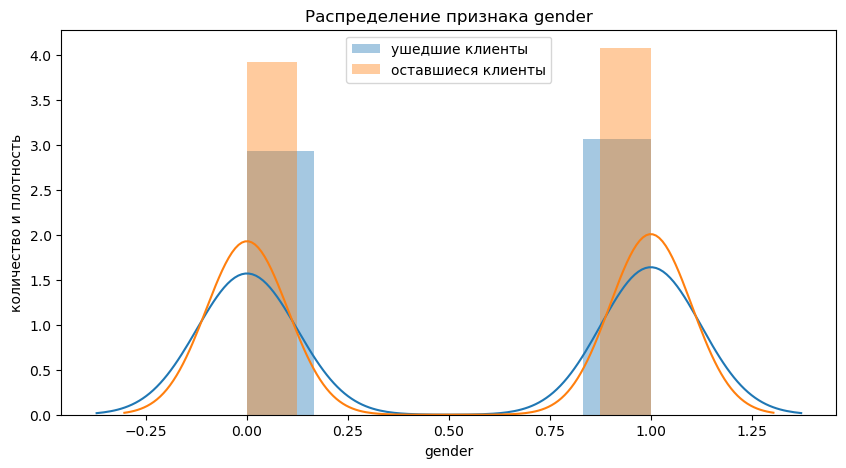

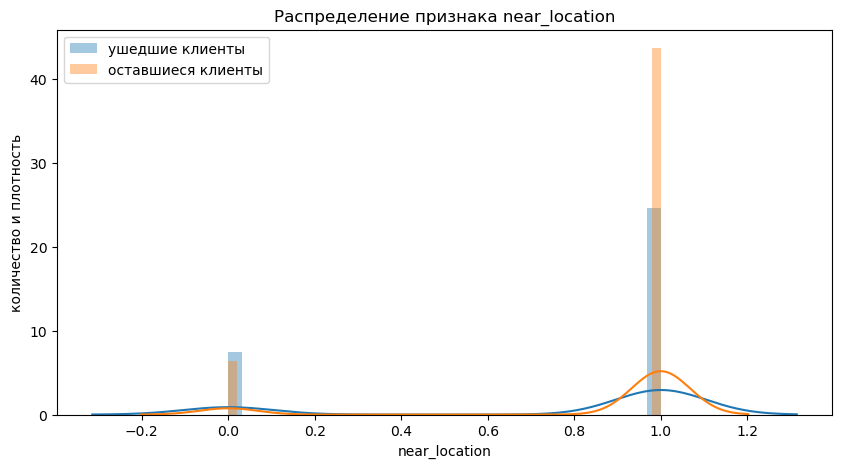

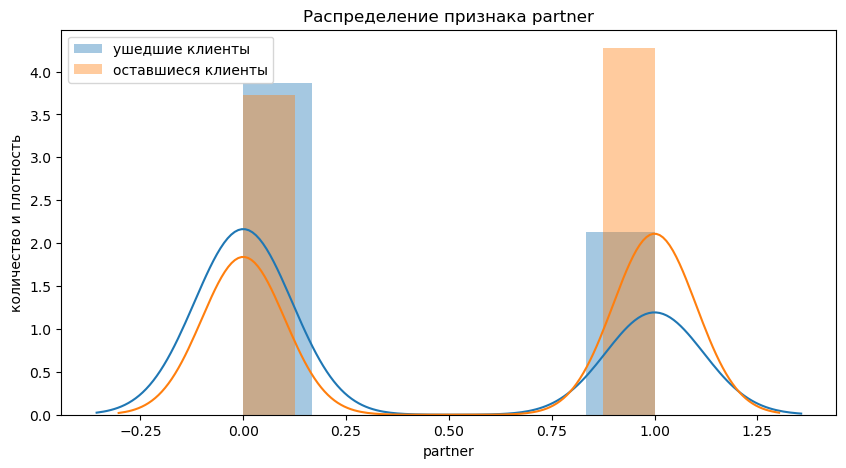

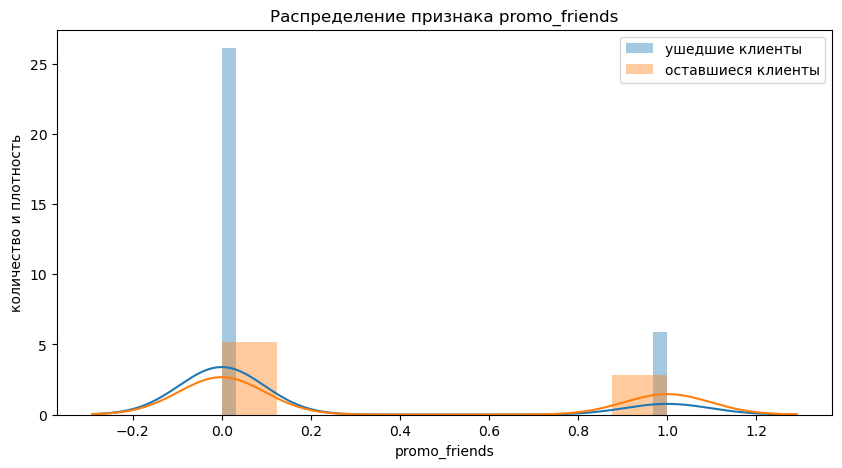

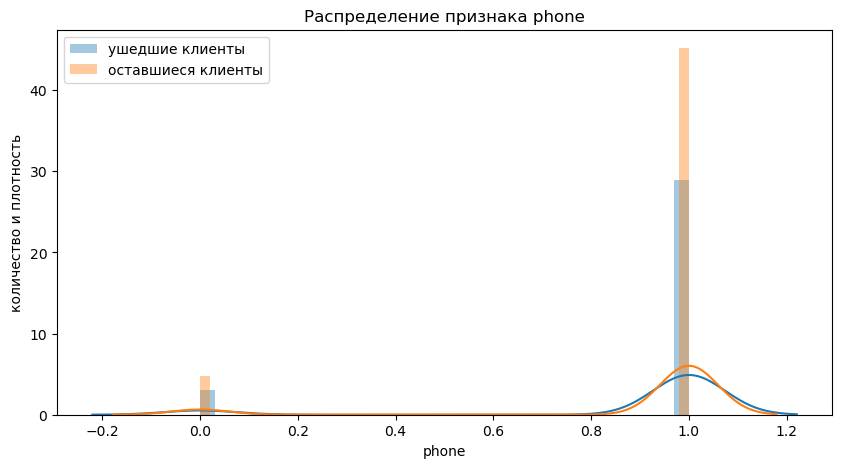

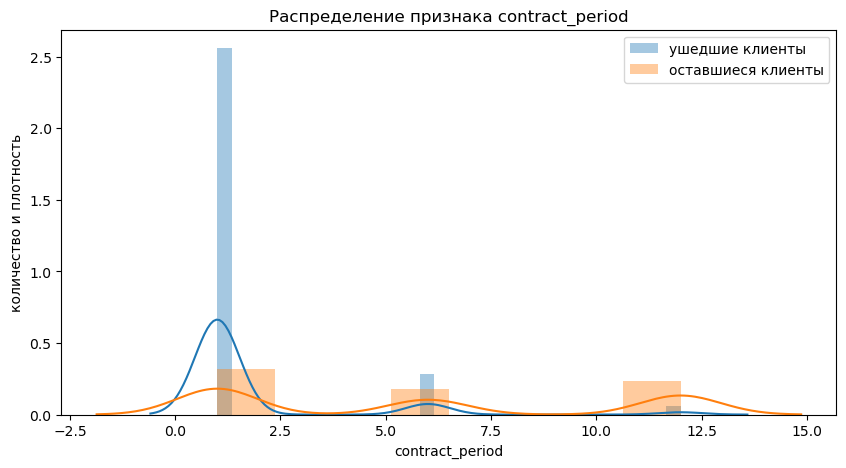

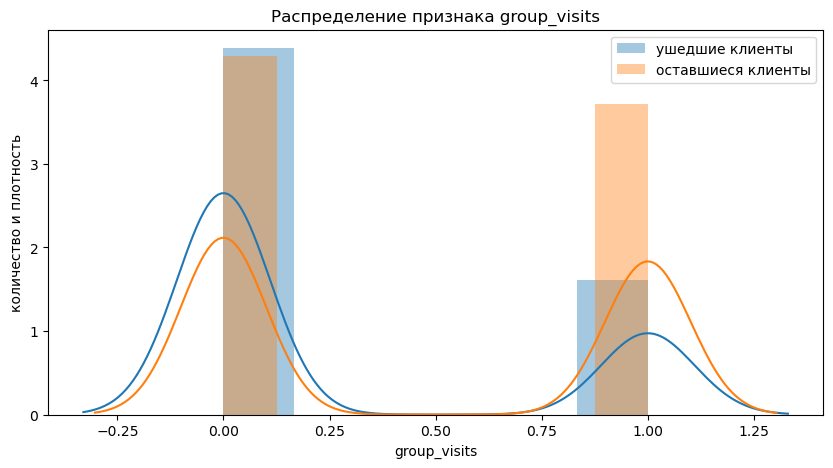

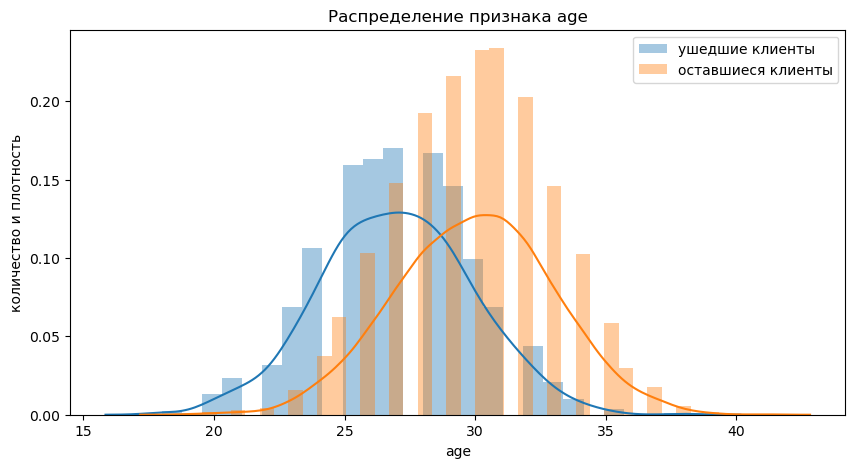

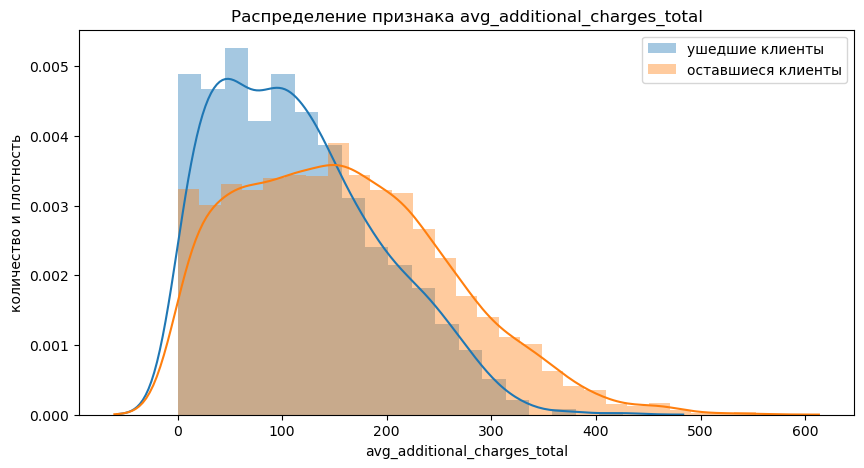

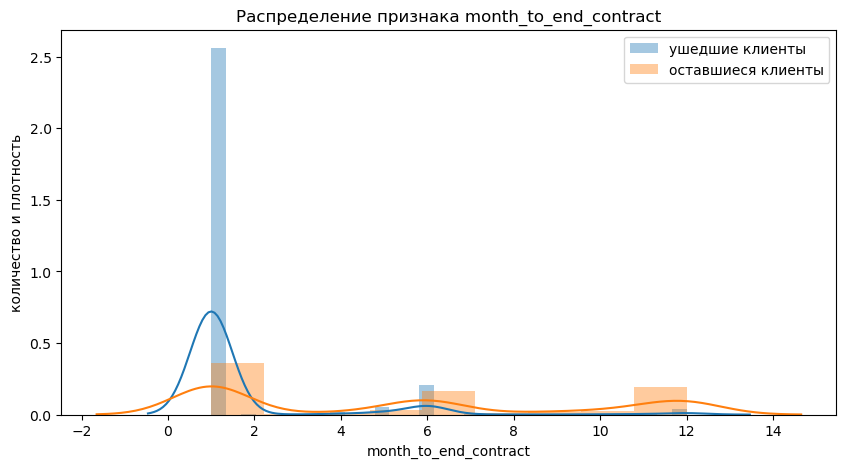

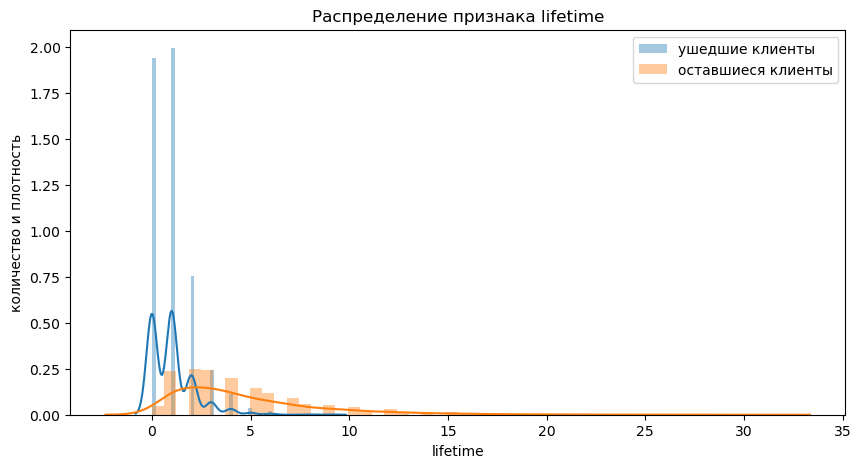

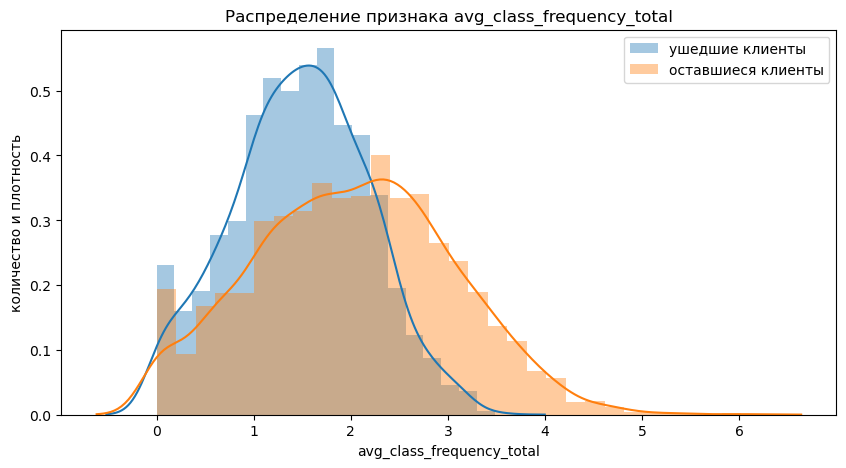

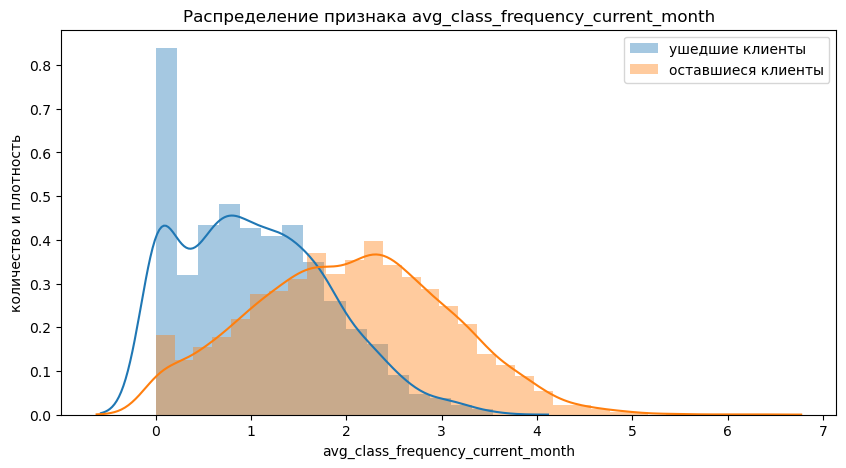

In [11]:
good = gym.query('churn == 0')
bad = gym.query('churn == 1')

for column in gym.drop('churn', axis = 1).columns:
    fig, ax = plt.subplots(figsize=(10,5))
    plt.title('Распределение признака ' + column)
    plt.xlabel(column)
    plt.ylabel('количество и плотность')
    sns.distplot(bad[column], label='ушедшие клиенты')
    sns.distplot(good[column], label='оставшиеся клиенты')
    plt.legend()
    plt.show()

По распределению признаков заметно, что ушедших клиентов меньше среди тех, кто: 

  - посещал групповые занятия, 
  - оплачивал абонемент более чем на 6 месяцев, 
  - старше 30 лет, 
  - посещает спортзал чаще 1 раза в неделю

**Задача 4**<a id="4"></a>
  - Построить матрицу корреляций и отобразить её.

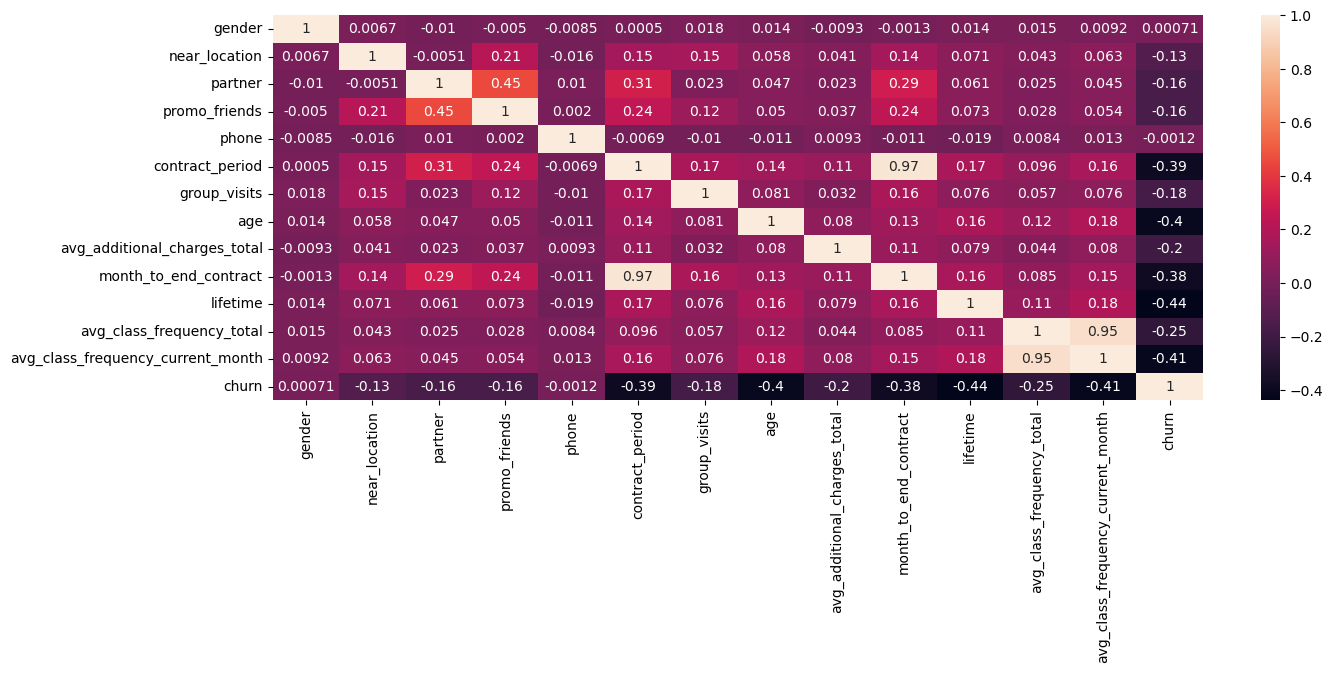

In [12]:
gym_c = gym.corr()
plt.figure(figsize=(15, 5))
sns.heatmap(data=gym_c, annot=True)
plt.show()

В основном корреляция низкая, кроме признаков `partner` и `promo_friends`, также `month_to_end_contract`--`contract_period`, и `avg_class_frequency_current_month`--`avg_class_frequency_total` имеют очень сильную корреляцию.

Чтобы избавиться от мультиколлинеарности, удалим из датафрейма парные признаки: срок до окончания абонемента и среднюю частоту посещений за все время.

In [13]:
gym_dr = gym.drop(columns={'month_to_end_contract','avg_class_frequency_total'})
gym_dr.shape

(4000, 12)

### Модель прогнозирования оттока клиентов

**Задача 6**<a id="6"></a>
  - Разбить данные на обучающую и валидационную выборку функцией train_test_split().

In [14]:
X = gym_dr.drop(['churn'], axis=1)
y = gym_dr['churn']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [16]:
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))

In [17]:
# обучим StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуем обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]

**Задача 7**<a id="5"></a>
  - Обучить модель на train-выборке двумя способами:
      * логистической регрессией
      * случайным лесом

In [18]:
# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1]

**Задача 8**<a id="8"></a>
  - Оценить метрики accuracy, precision и recall для обеих моделей на валидационной выборке. Сравнить по ним модели. Определить, какая модель показала себя лучше на основании метрик.

In [19]:
# выведем метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)

print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities, 
    title='Метрики для модели случайного леса:'
)

print('Соотношение классов:\n', gym_dr['churn'].value_counts())

Метрики для модели логистической регрессии:
	Accuracy: 0.90
	Precision: 0.79
	Recall: 0.82
Метрики для модели случайного леса:
	Accuracy: 0.89
	Precision: 0.80
	Recall: 0.75
Соотношение классов:
 0    2939
1    1061
Name: churn, dtype: int64


Модель логистической регрессии показала себя лучше на основании метрики Accuracy и Recall, модель случайного леса - на основе метрики Accuracy  и Precision. Правильно спрогнозированы более 80% ответов.

### Кластеризация клиентов

**Задача 9**

- Стандартизировать данные.

In [20]:
# обязательная стандартизация данных перед работой с алгоритмами
sc = StandardScaler()
X_sc = sc.fit_transform(X)

**Задача 10**
  - Построить матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисовать дендрограмму. На основании полученного графика предположить, какое количество кластеров можно выделить.

In [21]:
linked = linkage(X_sc, method = 'ward') 

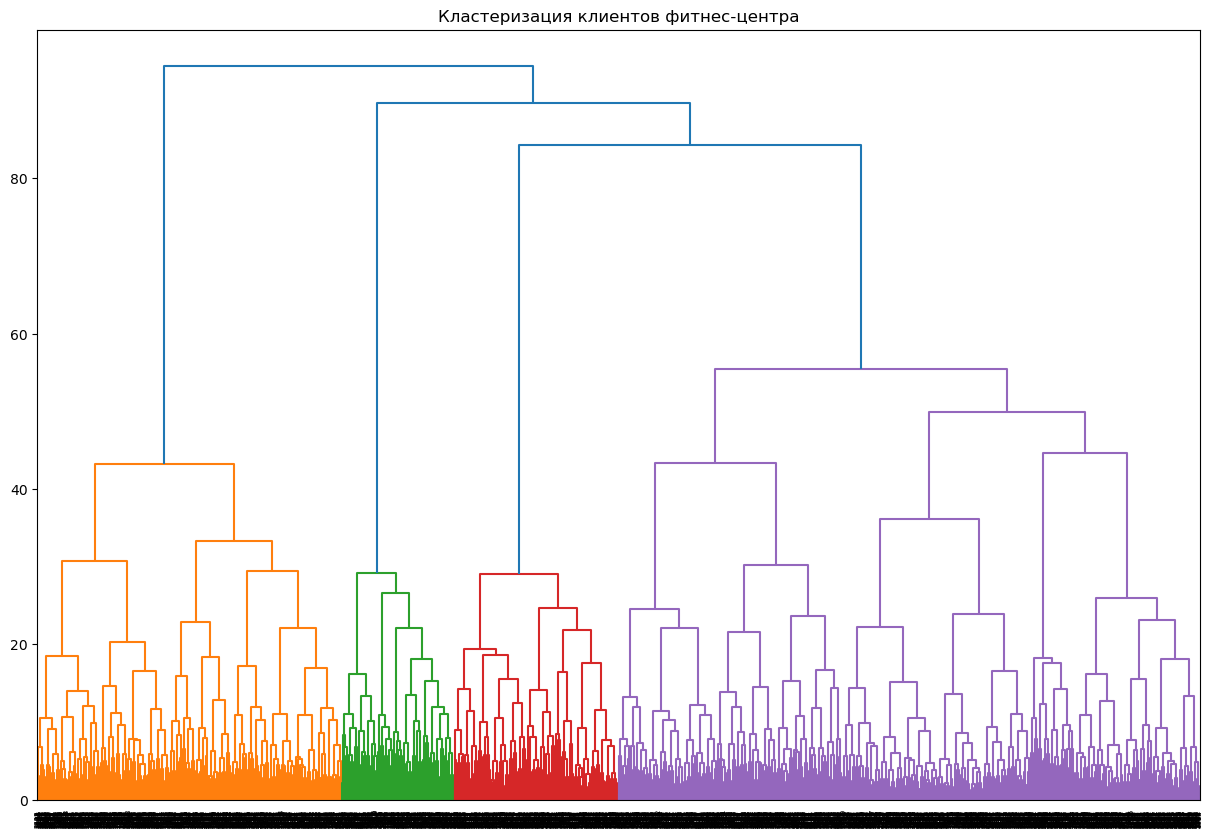

In [22]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Кластеризация клиентов фитнес-центра')
plt.show() 

На основании построенного графика можно выделить 4-5 основных кластера. 

**Задача 11**
  - Обучить модель кластеризации на основании алгоритма K-Means и спрогнозировать кластеры клиентов.

In [23]:
km = KMeans(n_clusters=5, random_state=0) # задаём число кластеров, равное 5, и фиксируем значение random_state
                                          # для воспроизводимости результата
labels = km.fit_predict(X_sc) # применяем алгоритм к данным и формируем вектор кластеров 

# сохраняем метки кластера в поле нашего датасета
gym_dr['cluster'] = labels

**Задача 12**
- Изучить средние значения признаков для кластеров.

In [24]:
gym_dr.groupby(['cluster']).mean().reset_index().T.round(2)

,0,1,2,3,4
cluster,0.00,1.00,2.00,3.00,4.00
gender,0.50,0.50,0.50,0.53,0.52
near_location,1.00,0.00,1.00,1.00,0.86
partner,0.89,0.49,0.22,0.38,0.47
promo_friends,1.00,0.08,0.07,0.01,0.31
phone,1.00,1.00,1.00,1.00,0.00
contract_period,6.92,2.99,2.01,6.21,4.78
group_visits,0.52,0.23,0.28,0.54,0.43
age,29.61,28.68,27.59,30.70,29.30
avg_additional_charges_total,153.42,137.13,119.23,176.43,144.21


На первый взгляд самый активный кластер среди всех - 3, а по оттоку клиентов лидирует 2. Построим распределения признаков, чтобы увидеть полную картину.

**Задача 13**

  - Постройте распределения признаков для кластеров.

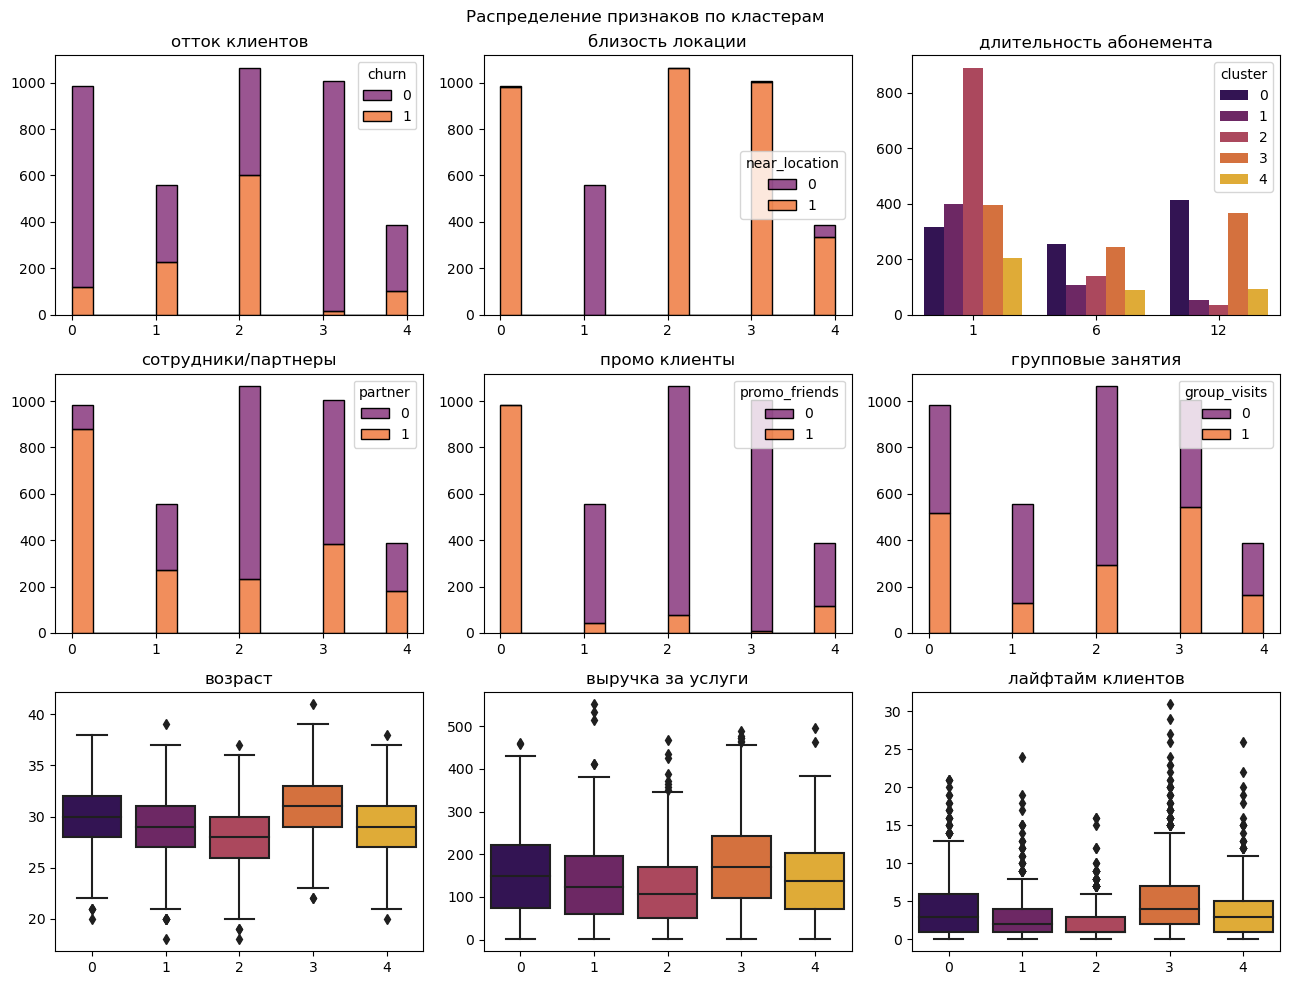

In [25]:
fig, axes = plt.subplots(3, 3, figsize=(13, 10))

fig.suptitle('Распределение признаков по кластерам')


sns.histplot(ax=axes[0, 0], data=gym_dr, x='cluster', hue='churn', multiple='stack', palette='inferno')\
                .set(title='отток клиентов', xlabel='', ylabel='')
sns.histplot(ax=axes[0, 1], data=gym_dr, x='cluster', hue='near_location', multiple='stack', palette='inferno')\
                .set(title='близость локации', xlabel='', ylabel='', label='')
sns.countplot(ax=axes[0, 2], data=gym_dr, x='contract_period', hue='cluster', palette='inferno')\
                .set(title='длительность абонемента', xlabel='', ylabel='')

sns.histplot(ax=axes[1, 0], data=gym_dr, x='cluster', hue='partner', multiple='stack', palette='inferno')\
                .set(title='сотрудники/партнеры', xlabel='', ylabel='')
sns.histplot(ax=axes[1, 1], data=gym_dr, x='cluster', hue='promo_friends', multiple='stack', palette='inferno')\
                .set(title='промо клиенты', xlabel='', ylabel='')
sns.histplot(ax=axes[1, 2], data=gym_dr, x='cluster', hue='group_visits',multiple='stack', palette='inferno')\
                .set(title='групповые занятия', xlabel='', ylabel='')

sns.boxplot(ax=axes[2, 0], data=gym_dr, x='cluster', y='age', palette='inferno')\
                .set(title='возраст', xlabel='', ylabel='')
sns.boxplot(ax=axes[2, 1], data=gym_dr, y='avg_additional_charges_total', x='cluster', palette='inferno')\
                .set(title='выручка за услуги', xlabel='', ylabel='')
sns.boxplot(ax=axes[2, 2], data=gym_dr, y='lifetime', x='cluster', palette='inferno')\
                .set(title='лайфтайм клиентов', xlabel='', ylabel='')
plt.tight_layout()
plt.show();

По средним показателям  и распределению признаков среди кластеров, можно сделать следущие выводы:

- **Кластер 0:**
Содержит наибольшее количество сотрудников и партнеров фитнес-центра среди всех кластеров, а также клиентов по акции с промо-кодами. Также у клиентов этого кластера наибольшая средняя длительность абонемента среди всех - 6 месяцев, но средний лайфтайм клиентов - 4 месяца. Также клиенты кластера на 2 месте по посещению групповых занятий и общей выручке за услуги центра. Средний возраст составляет 29 лет.


- **Кластер 1:**
Половина клиентов это сотрудники и партнеры фитнес-центра. Небольшое количество акционных клиентов. Средняя длительность купленного абонемента - 3 месяца. Низкая посещаемость групповых занятий - 20% и низкая средняя сумма выручки за услуги. Средняя частота посещений менее 2 раз в неделю. Также большая удаленность от фитнес-центра и высокий процент оттока - 40%.


- **Кластер 2:**
Находится на первом месте по оттоку среди всех - 56%. В нем меньше всего клиентов-сотрудников, а средняя длительность абонемента - 2 месяца. Самый низкий средний возраст среди всех - 27 лет, и самая низкая средняя сумма выручки.


- **Кластер 3:**
На первый взгляд наиболее надежный кластер. Процент оттока самый низкий из всех, а лайфтайм и длительность купленного абонемента выше всех. Также клиенты этого кластера не были привлечены промо-акцией, и среди них низкий процент сотрудников центра. Также видно что здесь самая высокая средняя сумма выручки, процент посещения групповых занятий и средний возраст - выше 30 лет.


- **Кластер 4:**
Средний по всем показателям кластер. Единственный, где клиенты не оставили номер телефона. По оттоку чуть менее 30%. Меньше половины составляют сотрудники. 30% промо-клиенты, это второе место среди кластеров. 

**Задача 14**
- Для каждого полученного кластера посчитать долю оттока. Определить, отличаются ли они по доле оттока, и какие кластеры склонны к оттоку, а какие — надёжны.

In [26]:
gym_dr.groupby('cluster')['churn'].agg(['mean','count'])\
                                  .reset_index()\
                                  .sort_values(by='mean', ascending=False).round(2)

,cluster,mean,count
2,2,0.56,1065
1,1,0.40,558
4,4,0.27,386
0,0,0.12,985
3,3,0.01,1006


Более всех к оттоку склонен самый большой кластер - 2. А второй по величине, кластер номер 3 склонен к оттоку менее всего.

### Выводы и базовые рекомендации по работе с клиентами

Самыми надежными оказались клиенты **3**-го кластера. Они:
- не были приведены по акции
- посещают групповые занятия
- оплачивали абонемент более чем на 6 месяцев
- старше 30 лет
- посещают спортзал чаще 1 раза в неделю
- живут/работают рядом с фитнес-центром

Самыми склонными к оттоку оказались клиенты **2**-го кластера:
- оплачивают абонемент на месяц
- были приведены по акции
- являются сотрудниками-партнерами фитнес-центра
- живут/работают поблизости
- не посещают групповые занятия
- младше 30 лет

Рекомендуется уделить меньше внимания и финансирования промо-акции и скидкам для сотрудников и партнеров фитнес-центра в пользу групповых занятий, ввести скидки на приобретение абонемента длительностью от 6 месяцев, возможно, поощрить более частое посещение зала(более 2 раз в неделю) скидками на дополнительные услуги фитнес-центра.